In [14]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install pandas scipy


  Using cached scipy-1.10.1-cp38-cp38-macosx_12_0_arm64.whl (28.8 MB)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('amazon.csv')


In [4]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [5]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [6]:
print(df['category'])

0       Computers&Accessories|Accessories&Peripherals|...
1       Computers&Accessories|Accessories&Peripherals|...
2       Computers&Accessories|Accessories&Peripherals|...
3       Computers&Accessories|Accessories&Peripherals|...
4       Computers&Accessories|Accessories&Peripherals|...
                              ...                        
1460    Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
1461    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1462    Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
1463    Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...
1464    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
Name: category, Length: 1465, dtype: object


In [22]:
catsplit = df['category'].str.split('|', expand=True)

df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()
catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})


df1['category_1'] = catsplit['category_1']
df1['category_2'] = catsplit['category_2']

df1.drop(columns='category', inplace=True)

catsplit

,category_1,category_2,category_3,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [23]:
# Convert string to numeric
# remove % sign 
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype('float')

# Calculate mean
average_discount_percentage = df['discount_percentage'].mean()

print(f"Average discount percentage across all products: {average_discount_percentage}%")

AttributeError: Can only use .str accessor with string values!

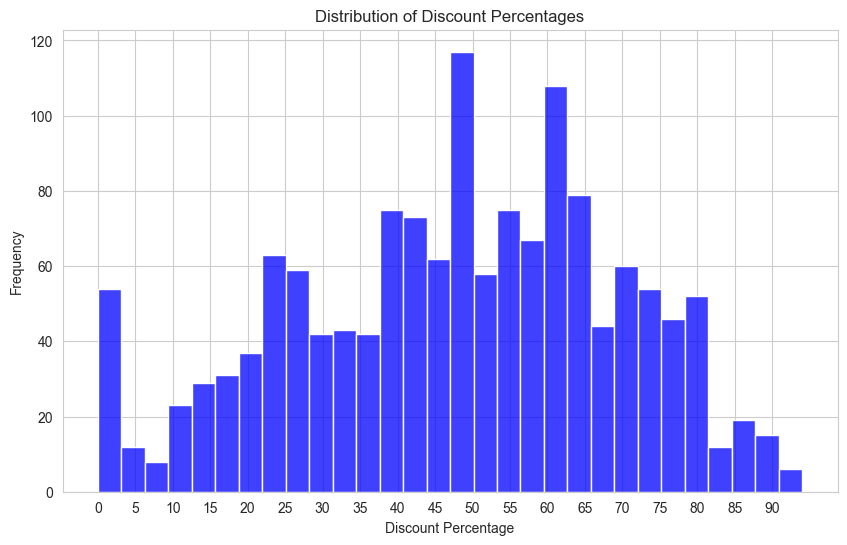

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the histogram for the discount_percentage column
plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], kde=False, bins=30, color='blue')

plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.xticks(range(0, int(df['discount_percentage'].max())+1, 5))

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Sample Data: Replace with loading your actual dataset
# Let's assume 'rating' is a column in your dataset
ratings = np.array([4.2, 3.9, 4.0, 4.2, 3.8, 4.1, 4.3, 4.0, 3.7, 4.2])

# Calculate mean rating
mean_rating = np.mean(ratings)

# Calculate standard deviation of ratings
std_dev = np.std(ratings, ddof=1) # ddof=1 for sample standard deviation

# Calculate standard error of the mean (SEM)
sem = stats.sem(ratings) # Alternatively, you can use std_dev / np.sqrt(len(ratings))

# Calculate 95% confidence interval for the mean rating
confidence_level = 0.95
degrees_freedom = len(ratings) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_rating, sem)

print(f"Mean Rating: {mean_rating}")
print(f"Standard Error of the Mean: {sem}")
print(f"95% Confidence Interval for the Mean Rating: {confidence_interval}")


Mean Rating: 4.040000000000001
Standard Error of the Mean: 0.06182412330330469
95% Confidence Interval for the Mean Rating: (3.900144116639248, 4.179855883360754)


In [ ]:
# Calculating the Standard Error for the sample means

# Standard deviation of the population
population_std = np.std(population_ratings)

# Number of observations in each sample
n = sample_size

# Calculating the Standard Error (SE) of the sample means
standard_error = population_std / np.sqrt(n)

standard_error


NameError: name 'population_ratings' is not defined